<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/061923_SIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries needed to construct the network and to plot the graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math as math
from math import log

In the following function **build_adjacency_list**, each node is followed by its corresponding neighbors. The index list shows the starting position of each node's neighbors in the neighbor list and the number of neighbors for each node. The function **print_adjacency_list** calls the prior function and prints the results.

In [2]:
def build_adjacency_list(edges):
    G = nx.Graph()  # Create a graph
    G.add_edges_from(edges) # add edges from input

    adjacency_list = {node: list(G.neighbors(node)) for node in G.nodes()} # Use a dictionary to build adjacency_list
    neighbor_list = [neighbor for neighbors in adjacency_list.values() for neighbor in neighbors] # put neighbors in a list
    neighbor_count = {node: len(neighbors) for node, neighbors in adjacency_list.items()} # store neighbor count in a dictionary

    neighbor_counts = np.array(list(neighbor_count.values()))
    start_indices = np.cumsum(neighbor_counts) - neighbor_counts # cumsum computes the cumulative sum of neighbor counts
    index_list = {node: start_index for node, start_index in zip(adjacency_list.keys(), start_indices)} # assign start index for each node

    return adjacency_list, index_list, neighbor_list, neighbor_count

def print_adjacency_list(edges):
    adj_list, index_list, neighbor_list, neighbor_count = build_adjacency_list(edges)

    print("Adjacency List:")
    for node, neighbors in adj_list.items():
        print(f"Node {node}: {neighbors}")

    print("\nNeighbor List:")
    print(neighbor_list)

    print("\nIndex List:")
    for node, start_index in index_list.items():
        print(f"{node}: {start_index}")

    print("\nNeighbor Count:")
    for node, count in neighbor_count.items():
        print(f"{node}: {count}")

In [3]:
# Test:
edges = [(0, 1), (0, 2), (1, 2), (2, 3)]
print_adjacency_list(edges)

Adjacency List:
Node 0: [1, 2]
Node 1: [0, 2]
Node 2: [0, 1, 3]
Node 3: [2]

Neighbor List:
[1, 2, 0, 2, 0, 1, 3, 2]

Index List:
0: 0
1: 2
2: 4
3: 7

Neighbor Count:
0: 2
1: 2
2: 3
3: 1


The **generate_degree_sequence** function generates a degree sequence of length n following a power law distribution with varying degrees.


> Parameters:
        n: Length of the degree sequence.
        gamma: Exponent of the power law distribution (gamma > 1).
        kmin: Minimum degree value in the sequence.

> Returns:
        list: Degree sequence following a power law distribution with varying degrees.

In [4]:
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n)) # max degree allowed is square root of n
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()


The **generate_configuration_model** function creates a random graph based on the input of a degree sequence
>  It checks if the sum of degrees is odd.
>  There should be no double connections and no self connections.

In [5]:
def generate_configuration_model(degree_sequence):
    # Create an empty graph and sum up the degrees
    G = nx.Graph()
    degree_sum = sum(degree_sequence)

    # Print error message if the sum is odd
    if degree_sum % 2 != 0:
        raise ValueError("Degree sum is odd")

    # Create a list of nodes based on the degree sequence
    nodes = []
    for node, degree in enumerate(degree_sequence):
        nodes.extend([node] * degree)

    # Shuffle the nodes list
    random.shuffle(nodes)

    # Track visited edges
    existing_edges = set()

    # Pair the nodes and add edges to the graph
    for i in range(0, len(nodes), 2):
        node1 = nodes[i]
        node2 = nodes[i + 1]

        # Check for self-edges and duplicate edges
        if node1 != node2 and (node1, node2) not in existing_edges:
            G.add_edge(node1, node2)
            existing_edges.add((node1, node2))
            existing_edges.add((node2, node1))

    return G

[3, 5, 3, 4, 5, 4, 6, 7, 3, 3, 7, 8, 9, 4, 3, 3, 3, 3, 6, 4, 5, 3, 3, 4, 3, 3, 12, 5, 3, 3, 5, 3, 3, 6, 6, 3, 5, 4, 5, 3, 8, 5, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 16, 3, 3, 3, 6, 4, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 4, 3, 9, 3, 4, 3, 4, 3, 3, 3, 3, 7, 4, 3, 8, 3, 3, 5, 4, 3, 5, 3, 4, 5, 3, 3, 3, 9, 3, 3, 3, 5, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 22, 3, 4, 3, 18, 5, 5, 4, 5, 14, 4, 6, 3, 8, 18, 3, 3, 3, 7, 7, 3, 3, 3, 12, 4, 3, 3, 3, 3, 3, 9, 3, 9, 6, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 7, 3, 15, 4, 4, 5, 4, 4, 3, 6, 5, 4, 4, 4, 3, 5, 4, 3, 3, 4, 3, 5, 3, 3, 3, 4, 3, 3, 7, 3, 3, 5, 3, 40, 5, 3, 3, 3, 5, 3, 7, 5, 3, 3, 5, 3, 6, 3, 3, 3, 5, 3, 3, 5, 5, 3, 3, 3, 10, 3, 3, 5, 3, 11, 9, 6, 3, 3, 3, 5, 4, 3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 5, 3, 6, 4, 3, 3, 7, 10, 3, 3, 22, 3, 3, 8, 3, 3, 6, 4, 3, 3, 7, 5, 4, 4, 3, 3, 3, 9, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 6, 33, 3, 3, 4, 3, 3, 3, 3, 4, 3, 6, 4, 5, 3, 3, 6, 12, 3, 4, 6, 3, 3, 5, 3, 4, 5, 6, 4, 7, 5, 4, 3, 3, 3, 6, 3, 3, 3, 36, 3, 3, 12, 7, 8, 3

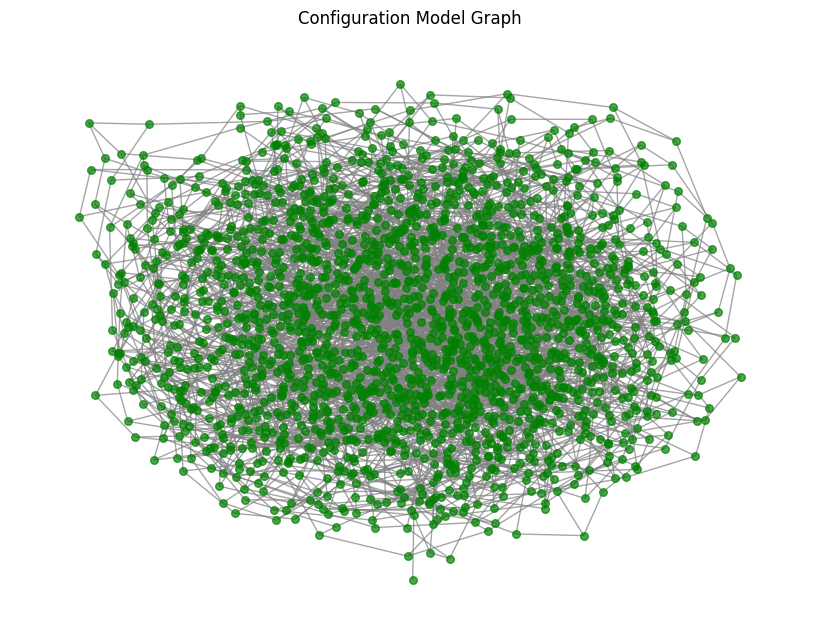

In [6]:
# Test the degree sequence
n = 2000
gamma = 2.7
kmin = 3

degrees = generate_degree_sequence(n, gamma, kmin)
print(degrees)

# Test configuration model
G = generate_configuration_model(degrees)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=30, node_color="green", with_labels=False, edge_color="gray", alpha=0.7)
plt.title("Configuration Model Graph")
plt.show()

[3, 5, 3, 3, 5, 5, 4, 5, 5, 3, 4, 6, 5, 4, 7, 5, 3, 3, 3, 3, 5, 4, 4, 3, 6, 3, 3, 7, 3, 3, 3, 5, 3, 10, 3, 4, 3, 4, 3, 3, 3, 5, 4, 3, 3, 3, 3, 3, 7, 3, 3, 3, 5, 4, 3, 3, 5, 3, 3, 3, 8, 4, 7, 3, 3, 4, 4, 12, 6, 6, 6, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 3, 10, 4, 13, 7, 5, 14, 3, 3, 3, 3, 7, 3, 3, 13, 14, 6, 4, 5, 5, 4, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


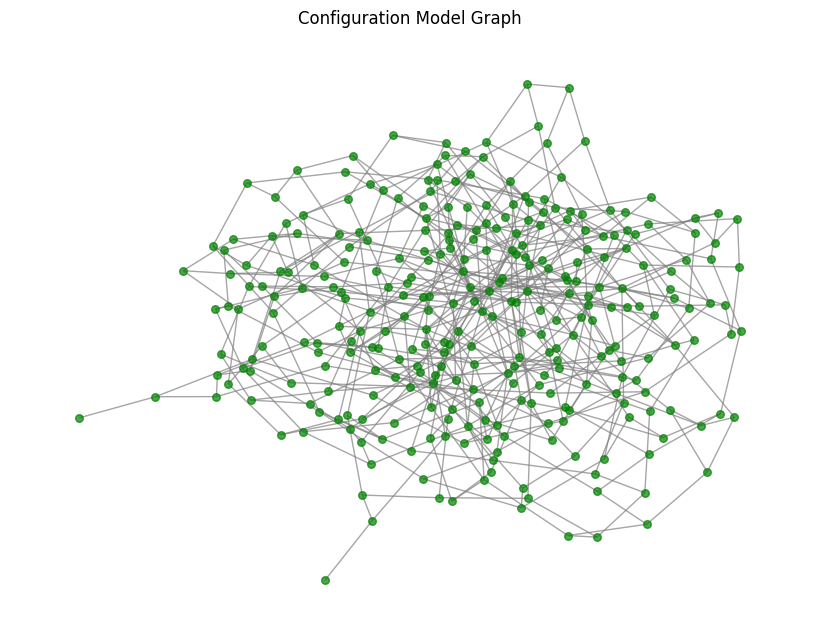

In [8]:
# Test the degree sequence
n2 = 300
gamma2 = 2.5
kmin2 = 3

degrees2 = generate_degree_sequence(n2, gamma2, kmin2)
print(degrees2)

# Test configuration model
G2 = generate_configuration_model(degrees2)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos, node_size=30, node_color="green", with_labels=False, edge_color="gray", alpha=0.7)
plt.title("Configuration Model Graph")
plt.show()

The **assign_disease_states** function randomly assigns disease states to nodes in a given graph, stores the states in a dictionary, and creates another set to store the infected nodes.

In [9]:
def assign_disease_states(G, frac_inf):
    N = len(G.nodes())
    N_inf = int(N * frac_inf) # Computes the number of nodes to be infected based on the fraction given

    infected_nodes = set(random.sample(G.nodes(), N_inf))
    states = {node: 1 if node in infected_nodes else 0 for node in G.nodes()}

    return states, infected_nodes

    #print("Disease states:", states)
    #print("Infected nodes:", infected_nodes)

The **color_graph_nodes** function takes the disease states array and graph as input and plot the graph with green color for susceptible nodes and red color for infected nodes.

In [10]:
def color_graph_nodes(states, G):
    susceptible_nodes = [node for node, state in states.items() if state == 0]
    infected_nodes = [node for node, state in states.items() if state == 1]
    node_colors = ['green' if node in susceptible_nodes else 'red' for node in G.nodes()]
    nx.draw(G, node_size=15, edge_color="grey", width=1, with_labels=False, node_color=node_colors)
    plt.show()

<ipython-input-9-507e7c44278b>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = set(random.sample(G.nodes(), N_inf))


Disease states: {1524: 0, 1053: 0, 892: 0, 1632: 0, 1282: 0, 1321: 0, 400: 0, 1454: 0, 72: 0, 1614: 0, 734: 1, 1937: 0, 1297: 0, 1739: 0, 155: 0, 471: 0, 1647: 0, 434: 0, 763: 0, 1603: 0, 177: 0, 208: 1, 917: 0, 851: 0, 1023: 0, 605: 0, 126: 0, 1316: 0, 1999: 0, 996: 0, 1778: 0, 339: 0, 1030: 0, 970: 0, 35: 1, 488: 0, 1320: 0, 486: 0, 1183: 0, 406: 0, 1815: 0, 1772: 1, 362: 0, 195: 0, 1790: 0, 220: 1, 154: 0, 506: 0, 1799: 0, 904: 0, 1005: 0, 442: 0, 662: 0, 90: 0, 1375: 0, 1852: 0, 1014: 0, 1973: 0, 993: 1, 1637: 1, 853: 0, 1425: 0, 558: 0, 82: 0, 1166: 0, 801: 0, 1113: 0, 1294: 0, 1865: 0, 1866: 0, 1149: 0, 165: 0, 371: 0, 1372: 0, 1384: 0, 302: 0, 535: 0, 1277: 0, 1098: 0, 537: 0, 1056: 0, 1448: 0, 603: 0, 1202: 0, 1813: 0, 1754: 0, 161: 0, 233: 0, 1450: 1, 812: 0, 1858: 0, 256: 0, 424: 0, 1: 0, 1714: 1, 1300: 1, 1850: 0, 952: 0, 477: 0, 547: 0, 569: 0, 95: 0, 1606: 0, 1142: 0, 283: 1, 496: 0, 1732: 0, 98: 0, 1122: 0, 653: 0, 342: 0, 1679: 0, 1363: 0, 1946: 0, 1670: 0, 674: 0, 1238:

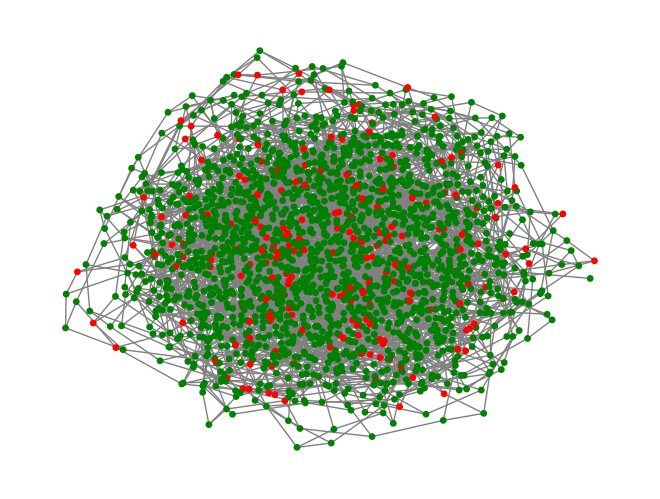

In [11]:
# Test:
states, infected = assign_disease_states(G, 0.1)
print("Disease states:", states)
print("Infected nodes:", infected)
color_graph_nodes(states, G)

The **count_infection** function summarizes the infection information, where Ninf counts the number of infected individuals and Ne counts the edges connecting infected individuals.

In [12]:
def count_infection(states,G):
    infected_nodes = [node for node, state in states.items() if state == 1]
    Ninf = len(infected_nodes)

    Ne = sum(G.degree(node) for node in infected_nodes)

    print("Number of infected:", Ninf)
    print("Number of edges connected to infected:", Ne)

    return Ninf, Ne

In [13]:
# Test:
states, infected = assign_disease_states(G, 0.1)
count_infection(states, G)

Number of infected: 200
Number of edges connected to infected: 686


<ipython-input-9-507e7c44278b>:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  infected_nodes = set(random.sample(G.nodes(), N_inf))


(200, 686)

The **OGA_SIS function** function simulates the spreading of a disease on a graph according to the SIS model, taking into account infection and recovery probabilities based on node degrees and the specified parameters.
>   Parameters: network, recovery rate (mu), transmission rate (lambda)

>   Return List: final infected number, final infected nodes, final network

In [14]:
def OGA_SIS(graph, mu, lam):
    # mu is the recovery rate, lam is the transmission rate
    new_inf_node = random.choice(list(graph.nodes()))
    states = {node: 0 for node in graph.nodes()}  # Initialize all nodes as susceptible
    states[new_inf_node] = 1  # Infect the randomly chosen node
    infected_nodes = [new_inf_node]
    N_inf = 1
    kmax = graph.degree[new_inf_node]
    t = 0

    while True:
        if N_inf == 0:
            # Restart the infection process with a new random infected node
            new_infected_node = random.choice(list(graph.nodes()))
            states = {node: 0 for node in graph.nodes()}
            states[new_infected_node] = 1  # Infect the newly chosen node
            infected_nodes = [new_infected_node]
            N_inf = 1
            kmax = graph.degree[new_infected_node]

        N_e = sum(graph.degree(node) for node in infected_nodes)
        R = mu * N_inf + lam * N_e

        if R == 0:
            break

        tau = -np.log(np.random.uniform(1e-6, 1)) / R

        if t > 100000000:
            break

        node = random.choice(infected_nodes)
        q = graph.degree[node] / kmax

        if np.random.uniform(0, 1) < q:
            p = (mu * N_inf) / R

            if np.random.uniform(0, 1) < p:
                states[node] = 0
                infected_nodes.remove(node)
                N_inf -= 1
            else:
                neighbors = [neighbor for neighbor in graph[node] if states[neighbor] == 0]
                if neighbors:
                    selected_neighbor = random.choice(neighbors)
                    states[selected_neighbor] = 1
                    infected_nodes.append(selected_neighbor)
                    N_inf += 1
                    kmax = max(kmax, graph.degree[selected_neighbor])
            t += tau
        else:
            break

    print("Final disease states:", states)
    #color_graph_nodes(states, G)

    final_Ninf = sum(states.values())
    print("Final infected: ", final_Ninf)

    final_inf_nodes = [node for node, state in states.items() if state == 1]
    print("Final infected nodes: ", final_inf_nodes)

    return final_Ninf, final_inf_nodes, graph


In [15]:
# Test:
OGA_SIS(G, 0.2, 0.1)

Final disease states: {1524: 0, 1053: 0, 892: 0, 1632: 0, 1282: 0, 1321: 0, 400: 0, 1454: 0, 72: 0, 1614: 0, 734: 0, 1937: 0, 1297: 0, 1739: 0, 155: 0, 471: 0, 1647: 0, 434: 0, 763: 0, 1603: 0, 177: 0, 208: 0, 917: 0, 851: 0, 1023: 0, 605: 0, 126: 0, 1316: 0, 1999: 0, 996: 0, 1778: 0, 339: 0, 1030: 0, 970: 0, 35: 0, 488: 0, 1320: 0, 486: 0, 1183: 0, 406: 0, 1815: 0, 1772: 0, 362: 0, 195: 0, 1790: 0, 220: 0, 154: 0, 506: 0, 1799: 0, 904: 0, 1005: 0, 442: 0, 662: 0, 90: 0, 1375: 0, 1852: 0, 1014: 0, 1973: 0, 993: 0, 1637: 0, 853: 0, 1425: 0, 558: 0, 82: 0, 1166: 0, 801: 0, 1113: 0, 1294: 0, 1865: 0, 1866: 0, 1149: 0, 165: 0, 371: 0, 1372: 0, 1384: 0, 302: 0, 535: 0, 1277: 0, 1098: 0, 537: 0, 1056: 0, 1448: 0, 603: 0, 1202: 0, 1813: 0, 1754: 0, 161: 0, 233: 0, 1450: 0, 812: 0, 1858: 0, 256: 0, 424: 0, 1: 0, 1714: 0, 1300: 0, 1850: 0, 952: 0, 477: 0, 547: 0, 569: 0, 95: 0, 1606: 0, 1142: 0, 283: 0, 496: 0, 1732: 0, 98: 0, 1122: 0, 653: 0, 342: 0, 1679: 0, 1363: 0, 1946: 0, 1670: 0, 674: 0,

(4, [73, 635, 1194, 1416], <networkx.classes.graph.Graph at 0x7f65658e3100>)